**Rahel Cecilia Purba SC61717**

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
df= pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 1. Data Preparation

Tidak ada missing value di dalam dataset ini.

In [ ]:
#Handling Missing Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Terdapat 723 rows yang duplikat. Semua rows tersebut akan di hapus.

In [ ]:
#Duplicate
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#Drop Duplicates
dfclean = df.drop_duplicates()
dfclean.reset_index(drop=True, inplace=True)
dfclean.index +=1
dfclean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
dfclean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Diputuskan untuk tidak menghapus outlier karena dataset ini adalah data penyakit jantung yang dimana berbagai data dibutuhkan sebagai referensi.

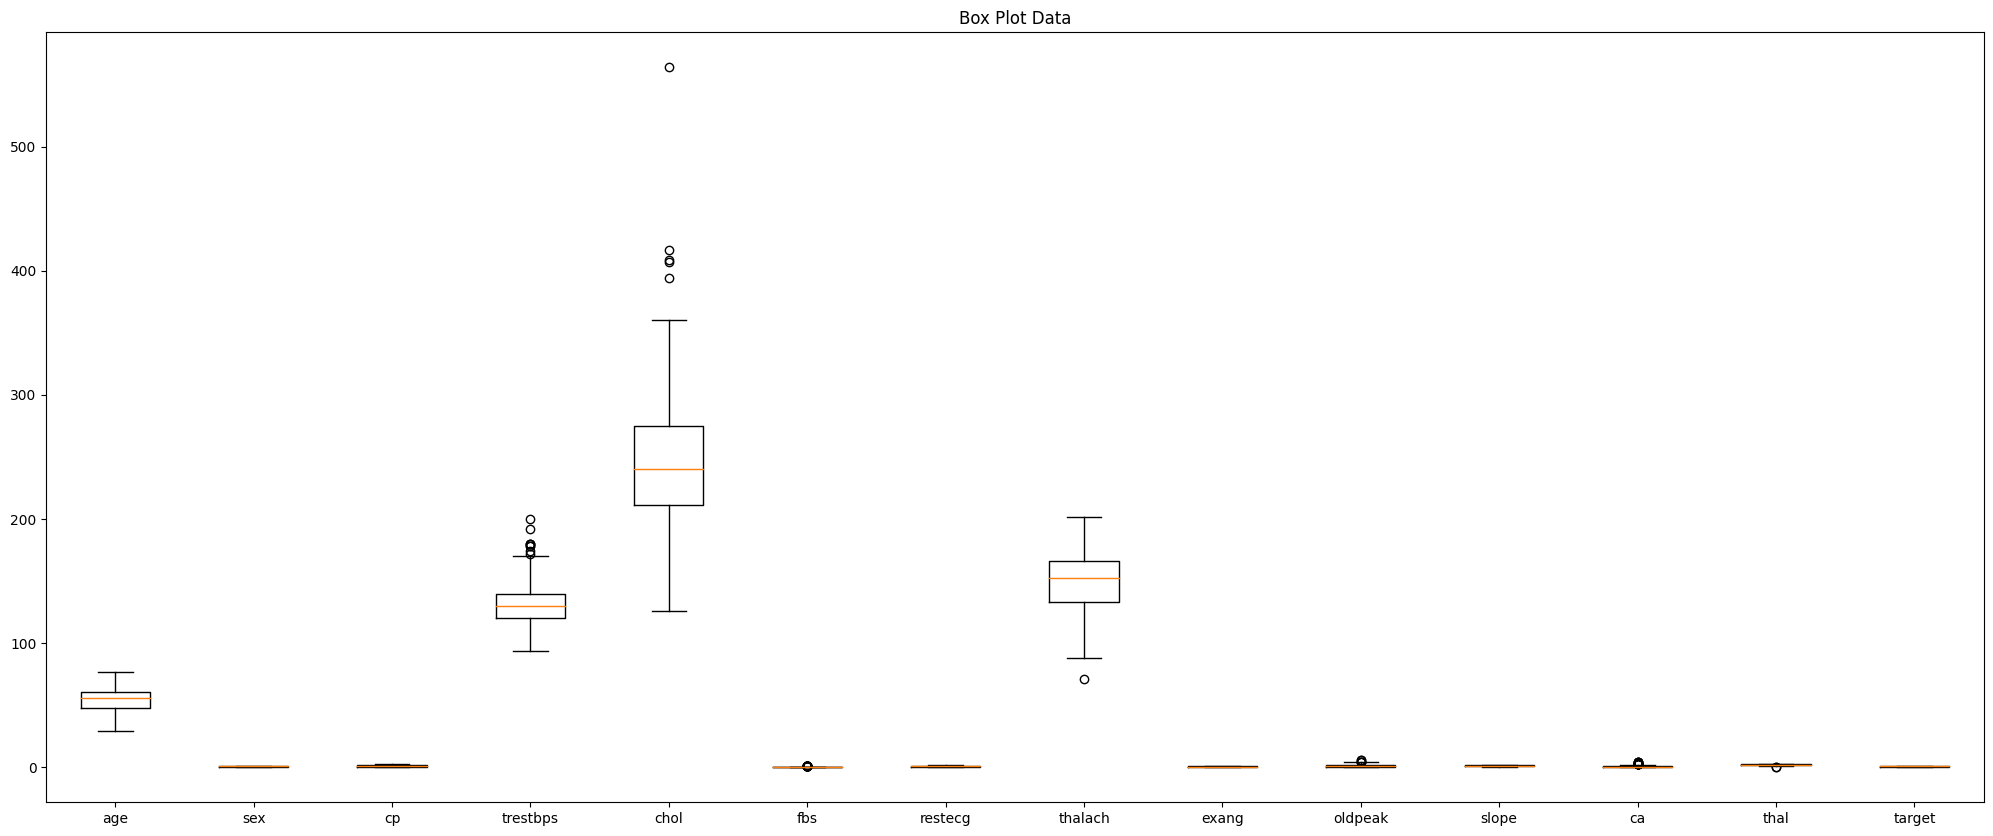

In [ ]:
#Outlier
plt.figure(figsize=(25, 10))
plt.boxplot(dfclean.values, labels=dfclean.columns)
plt.title('Box Plot Data')
plt.show()

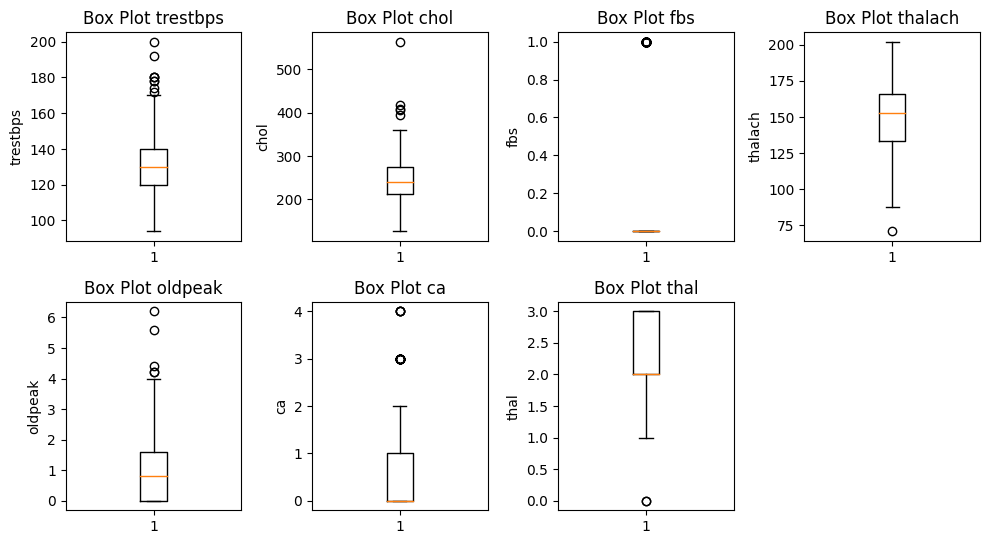

In [ ]:
# Column yang memiliki outlier
column_plot = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

plt.figure(figsize=(10, 8))
for i, column in enumerate(column_plot, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(dfclean[ column])
    plt.title(f'Box Plot {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

Tidak dilakukan penyeimbangan pada imbalance dikarenakan perbedaan nya hanya sedikit.

In [ ]:
#Imbalance
imbalance = dfclean['target'].value_counts()

#Mencari kelas mayoritas dan kelas minoritas dari jumlah perkelas
kelas_mayoritas = imbalance.idxmax()
kelas_minoritas = imbalance.idxmin()

print("Kelas Mayoritas:", kelas_mayoritas)
print("Jumlah Sampel Kelas Mayoritas:",imbalance[kelas_mayoritas])
print("Kelas Minoritas:", kelas_minoritas)
print("Jumlah Sampel Kelas Minoritas:", imbalance[kelas_minoritas])


Kelas Mayoritas: 1
Jumlah Sampel Kelas Mayoritas: 164
Kelas Minoritas: 0
Jumlah Sampel Kelas Minoritas: 138


Tidak perlu di encoding karena semuanya merupakan data numerical.

In [ ]:
#Encoding
dfclean.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# 2. Exploratory Data Analysis (EDA)

In [ ]:
dfclean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
dfclean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Semua tipe data perkolom adalah int64.

In [ ]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Tertera dibawah jumlah mean,min Q1,Q2,Q3 dan nilai max pada keseluruhan kolom.

In [ ]:
dfclean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


nilai modus pada dataset.

In [ ]:
modus = dfclean.mode
modus()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pasien yang terkena penyakit jantung berdasarkan usia.

In [ ]:
dftarget = dfclean.groupby(['age','target']) ['target'].count()
dftarget.head()

age  target
29   1         1
34   1         2
35   0         2
     1         2
37   1         2
Name: target, dtype: int64

Jumlah pasien yang terdeteksi terkena penyakit jantung dan tidak terkena berdasarkan jenis kelamin.

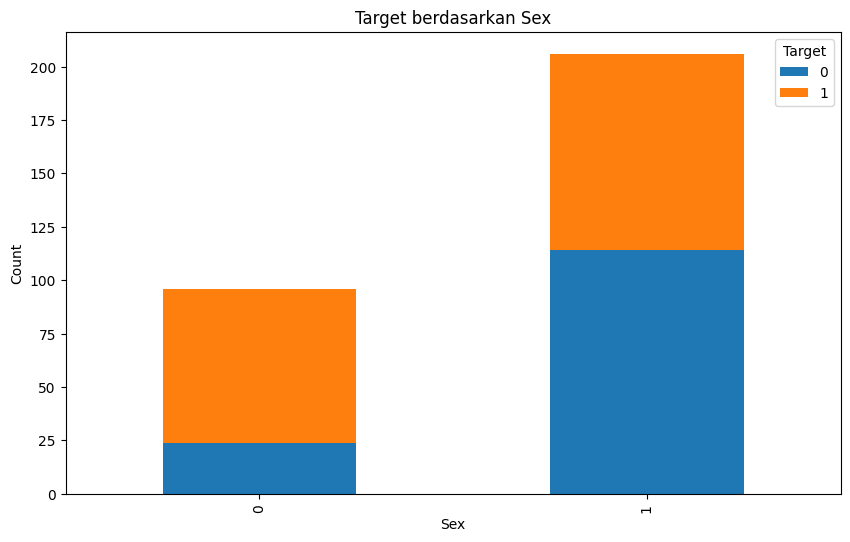

In [ ]:
target_counts = dfclean.groupby('sex')['target'].value_counts().unstack()

target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Target berdasarkan Sex')
plt.legend(title='Target')
plt.show()


Persebaran jenis nyeri dada(cp).

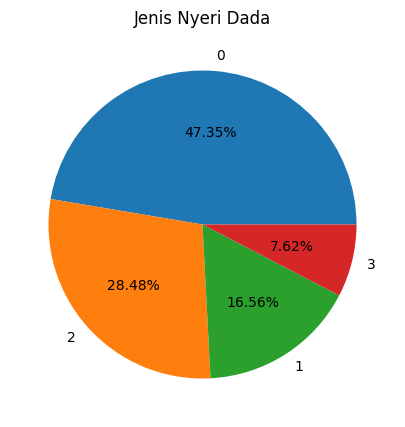

In [ ]:
cp_counts = dfclean['cp'].value_counts()
fig=plt.figure(figsize=(10,5))
plt.pie(cp_counts, labels=cp_counts.index,autopct='%1.2f%%')
plt.title('Jenis Nyeri Dada')
plt.show()

Persebaran data pasien dimana thalach sebagai detak jantung maksimal yang dicapai ketika berolahraga dan oldpeak sebagai nilai dari deperesi ST yang disebabkan oleh aktivitas olahraga.

In [ ]:
chart = px.scatter(dfclean, x="oldpeak", y="thalach")
chart.show()

# 3. Feature Engineering

In [ ]:
# Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.

**the explanation about the feature**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
dfclean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


1. Status Gula Darah Puasa(fbs=fasting blood pressure) pasien yang dapat dicegah jika belum berstatus diabetes

In [ ]:
def status_fbs(fbs):
    if fbs == 1:
        return 'diabetes'
    else:
        return 'normal'


dfclean1 = dfclean.copy()
dfclean1.insert(6, 'status_diabetes', dfclean['fbs'].apply(status_fbs))


In [ ]:
dfclean1

,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,normal,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,diabetes,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,normal,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,normal,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,diabetes,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,normal,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,normal,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,normal,0,125,0,0.0,2,0,2,0


2. Berdasarkan PJNHK (Pusat Jantung Nasional Harapan Kita), detak jantung yang normal saat berolahraga(thalach) adalah 220-usia. Jika sudah detak jantungnya diatas dari normal thalach, maka dapat diberikan perawatan.

In [ ]:
normal = 220 - dfclean1['age']

dfclean2 = dfclean1.copy()
dfclean2.insert(9, 'normal_thalach', normal)
dfclean2

,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,normal,1,168,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,diabetes,0,155,167,1,3.1,0,0,3,0
3,70,1,0,145,174,0,normal,1,125,150,1,2.6,0,0,3,0
4,61,1,0,148,203,0,normal,1,161,159,0,0.0,2,1,3,0
5,62,0,0,138,294,1,diabetes,1,106,158,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,115,152,0,1.5,1,0,2,1
299,44,0,2,108,141,0,normal,1,175,176,0,0.6,1,0,2,1
300,52,1,0,128,255,0,normal,1,161,168,1,0.0,2,1,3,0
301,59,1,3,160,273,0,normal,0,125,161,0,0.0,2,0,2,0


3. Status tekanan darah saat istirahat (trestbps), normalnya berada di rentang tidak dibawah 90/60mmHg dan tidak diatas 120/80mmHg. Pasien yang status tekanan darahnya tidak tinggi, maka dapat tetap melakukan pola hidup sehat untuk mencegah terserang penyakit.

In [ ]:
def status_trestbps(trestbps):
    if trestbps < 90:
        return 'rendah'
    elif 90 <= trestbps < 120:
        return 'normal'
    else:
        return 'tinggi'

dfclean3 = dfclean2.copy()
dfclean3.insert(4, 'status_tekanan_darah', dfclean2['trestbps'].apply(status_trestbps))
dfclean3

,age,sex,cp,trestbps,status_tekanan_darah,chol,fbs,status_diabetes,restecg,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,tinggi,212,0,normal,1,168,168,0,1.0,2,2,3,0
2,53,1,0,140,tinggi,203,1,diabetes,0,155,167,1,3.1,0,0,3,0
3,70,1,0,145,tinggi,174,0,normal,1,125,150,1,2.6,0,0,3,0
4,61,1,0,148,tinggi,203,0,normal,1,161,159,0,0.0,2,1,3,0
5,62,0,0,138,tinggi,294,1,diabetes,1,106,158,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,tinggi,211,0,normal,0,115,152,0,1.5,1,0,2,1
299,44,0,2,108,normal,141,0,normal,1,175,176,0,0.6,1,0,2,1
300,52,1,0,128,tinggi,255,0,normal,1,161,168,1,0.0,2,1,3,0
301,59,1,3,160,tinggi,273,0,normal,0,125,161,0,0.0,2,0,2,0


4. Terdapat 4 tingkat nyeri dada(cp=chest pain) yang dirasakan pasien. Jika status pasien sudah sakit, maka harus segera dilakukan perawatan.

In [ ]:
def status_cp(cp):
    if cp < 1:
        return 'sehat'
    elif cp == 1 :
        return 'baik'
    elif cp == 2 :
        return 'waspada'
    else:
        return 'sakit'

dfclean4 = dfclean3.copy()
dfclean4.insert(3, 'status_nyeri_dada', dfclean3['cp'].apply(status_cp))
dfclean4

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,fbs,status_diabetes,restecg,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,sehat,125,tinggi,212,0,normal,1,168,168,0,1.0,2,2,3,0
2,53,1,0,sehat,140,tinggi,203,1,diabetes,0,155,167,1,3.1,0,0,3,0
3,70,1,0,sehat,145,tinggi,174,0,normal,1,125,150,1,2.6,0,0,3,0
4,61,1,0,sehat,148,tinggi,203,0,normal,1,161,159,0,0.0,2,1,3,0
5,62,0,0,sehat,138,tinggi,294,1,diabetes,1,106,158,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,0,normal,0,115,152,0,1.5,1,0,2,1
299,44,0,2,waspada,108,normal,141,0,normal,1,175,176,0,0.6,1,0,2,1
300,52,1,0,sehat,128,tinggi,255,0,normal,1,161,168,1,0.0,2,1,3,0
301,59,1,3,sakit,160,tinggi,273,0,normal,0,125,161,0,0.0,2,0,2,0


5. Menjaga kolesterol agar tidak sampai melewati batas tinggi merupakan salah satu upaya pencegahan serangan jantung

In [ ]:
def status_chol(chol):
    if chol < 200:
        return 'normal'
    elif 200 <= chol < 239:
        return 'batas_tinggi'
    else:
        return 'tinggi'

dfclean5 = dfclean4.copy()
dfclean5.insert(7, 'status_kolesterol', dfclean4['chol'].apply(status_chol))
dfclean5

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,restecg,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,1,168,168,0,1.0,2,2,3,0
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,0,155,167,1,3.1,0,0,3,0
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,1,125,150,1,2.6,0,0,3,0
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,1,161,159,0,0.0,2,1,3,0
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,1,106,158,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,0,115,152,0,1.5,1,0,2,1
299,44,0,2,waspada,108,normal,141,normal,0,normal,1,175,176,0,0.6,1,0,2,1
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,1,161,168,1,0.0,2,1,3,0
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,0,125,161,0,0.0,2,0,2,0


6. Diabetes dan hipertensi adalah gejala penyakit jantung. Untuk itu, kepada pasien yang tidak berpotensi terkena penyakit jantung agar selalu menjaga kesehatan.

In [ ]:
def prediksi(row):
    if row['status_tekanan_darah'] == 'tinggi' and row['status_diabetes'] == 'diabetes':
        return 'Berpotensi terkena penyakit jantung'
    else:
        return 'Tidak berpotensi terkena penyakit jantung'

column = dfclean5[['status_tekanan_darah', 'status_diabetes']]
dfclean6 = dfclean5.copy()
dfclean6['prediksi_thdp_diabestes_hipertensi'] = column.apply(prediksi, axis=1)
dfclean6

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,restecg,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target,prediksi_thdp_diabestes_hipertensi
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,1,168,168,0,1.0,2,2,3,0,Tidak berpotensi terkena penyakit jantung
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,0,155,167,1,3.1,0,0,3,0,Berpotensi terkena penyakit jantung
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,1,125,150,1,2.6,0,0,3,0,Tidak berpotensi terkena penyakit jantung
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,1,161,159,0,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,1,106,158,0,1.9,1,3,2,0,Berpotensi terkena penyakit jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,0,115,152,0,1.5,1,0,2,1,Tidak berpotensi terkena penyakit jantung
299,44,0,2,waspada,108,normal,141,normal,0,normal,1,175,176,0,0.6,1,0,2,1,Tidak berpotensi terkena penyakit jantung
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,1,161,168,1,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,0,125,161,0,0.0,2,0,2,0,Tidak berpotensi terkena penyakit jantung


7. Saran yang dapat dilakukan berdasarkan nyeri dada yang dirasakan (cp) dan nyeri dada yang dirasakan akibat berolahraga (exang).

In [ ]:
def saran_thdp_nyeri_dada(row):
    if row['status_nyeri_dada'] == 'sakit' and row['exang'] == 1:
        return 'Parah'
    elif row['status_nyeri_dada'] == 'waspada' and row['exang'] == 1:
        return 'Dapat diberi perawatan'
    else:
        return 'Dilakukan pencegahan'

column = dfclean6[['status_nyeri_dada', 'exang']]
dfclean7 = dfclean6.copy()
dfclean7['saran_thdp_nyeri_dada'] = column.apply(saran_thdp_nyeri_dada, axis=1)
dfclean7

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,...,thalach,normal_thalach,exang,oldpeak,slope,ca,thal,target,prediksi_thdp_diabestes_hipertensi,saran_thdp_nyeri_dada
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,...,168,168,0,1.0,2,2,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,...,155,167,1,3.1,0,0,3,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,...,125,150,1,2.6,0,0,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,...,161,159,0,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,...,106,158,0,1.9,1,3,2,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,...,115,152,0,1.5,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
299,44,0,2,waspada,108,normal,141,normal,0,normal,...,175,176,0,0.6,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,...,161,168,1,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,...,125,161,0,0.0,2,0,2,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan


8. Usia lansia > 60 tahun, harus mulai memperhatikan diabetesnya : Kadar gula darah puasa normal: 70-100 mg/dL. Kadar gula darah pada 2 jam setelah makan: kurang dari 140 mg/dL.

In [ ]:
def saran_thdp_diabetes(row):
    if row['fbs'] == 1 and row['age'] >= 60:
        return 'lansia diabetes'
    elif row['fbs'] == 0 and row['age'] >= 60:
        return 'lansia sehat'
    elif row['fbs'] == 1 and row['age'] <= 60:
        return 'dewasa diabetes'
    else:
        return 'dewasa sehat'

column = dfclean7[['fbs', 'age']]
dfclean8 = dfclean7.copy()
dfclean8['saran_thdp_diabetes'] = column.apply(saran_thdp_diabetes, axis=1)
dfclean8

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,...,normal_thalach,exang,oldpeak,slope,ca,thal,target,prediksi_thdp_diabestes_hipertensi,saran_thdp_nyeri_dada,saran_thdp_diabetes
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,...,168,0,1.0,2,2,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,...,167,1,3.1,0,0,3,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa diabetes
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,...,150,1,2.6,0,0,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,...,159,0,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,...,158,0,1.9,1,3,2,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,...,152,0,1.5,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
299,44,0,2,waspada,108,normal,141,normal,0,normal,...,176,0,0.6,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,...,168,1,0.0,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,...,161,0,0.0,2,0,2,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat


9. Oldpeak (depresi ST) adalah pengukuran perubahan pada segmen ST pada elektrokardiogram (EKG) yang dapat mengindikasikan masalah pada jantung.
Nilai depresi ST yang melebihi 1 sering dianggap abnormal. Untuk itu, dapat dilakukan pencegahan.


In [ ]:
def status_oldpeak(oldpeak):
    if oldpeak <=  1.0:
        return 'normal'
    else:
        return 'abnormal'

dfclean9 = dfclean8.copy()
dfclean9.insert(15, 'status_oldpeak', dfclean8['oldpeak'].apply(status_oldpeak))
dfclean9

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,...,exang,oldpeak,status_oldpeak,slope,ca,thal,target,prediksi_thdp_diabestes_hipertensi,saran_thdp_nyeri_dada,saran_thdp_diabetes
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,...,0,1.0,normal,2,2,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,...,1,3.1,abnormal,0,0,3,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa diabetes
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,...,1,2.6,abnormal,0,0,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,...,0,0.0,normal,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,...,0,1.9,abnormal,1,3,2,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,...,0,1.5,abnormal,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
299,44,0,2,waspada,108,normal,141,normal,0,normal,...,0,0.6,normal,1,0,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,...,1,0.0,normal,2,1,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,...,0,0.0,normal,2,0,2,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat


10. ca = jumlah pembuluh darah besar yang terwarnai dengan flourosopy yang mencerminkan kondisi pembuluh darah besar. Fluoroskopi adalah teknik pencitraan medis yang menggunakan sinar-X untuk memvisualisasikan struktur internal tubuh secara real-time. nilai 0-4 mungkin mengindikasikan tingkat keparahan atau penyumbatan pembuluh darah. maka, pasien yang belum terindikasi penyumbatan pembuluh darah besar, maka harus dilakukan pencegahan.

In [ ]:
def status_ca(ca):
    if ca == 0:
        return 'normal'
    elif ca in [1, 2]:
        return 'waspada'
    else:
        return 'parah'

dfclean10 = dfclean9.copy()
dfclean10.insert(18, 'status_ca', dfclean9['ca'].apply(status_ca))
dfclean10

,age,sex,cp,status_nyeri_dada,trestbps,status_tekanan_darah,chol,status_kolesterol,fbs,status_diabetes,...,oldpeak,status_oldpeak,slope,ca,status_ca,thal,target,prediksi_thdp_diabestes_hipertensi,saran_thdp_nyeri_dada,saran_thdp_diabetes
1,52,1,0,sehat,125,tinggi,212,batas_tinggi,0,normal,...,1.0,normal,2,2,waspada,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
2,53,1,0,sehat,140,tinggi,203,batas_tinggi,1,diabetes,...,3.1,abnormal,0,0,normal,3,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa diabetes
3,70,1,0,sehat,145,tinggi,174,normal,0,normal,...,2.6,abnormal,0,0,normal,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
4,61,1,0,sehat,148,tinggi,203,batas_tinggi,0,normal,...,0.0,normal,2,1,waspada,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
5,62,0,0,sehat,138,tinggi,294,tinggi,1,diabetes,...,1.9,abnormal,1,3,parah,2,0,Berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,waspada,120,tinggi,211,batas_tinggi,0,normal,...,1.5,abnormal,1,0,normal,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,lansia sehat
299,44,0,2,waspada,108,normal,141,normal,0,normal,...,0.6,normal,1,0,normal,2,1,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
300,52,1,0,sehat,128,tinggi,255,tinggi,0,normal,...,0.0,normal,2,1,waspada,3,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat
301,59,1,3,sakit,160,tinggi,273,tinggi,0,normal,...,0.0,normal,2,0,normal,2,0,Tidak berpotensi terkena penyakit jantung,Dilakukan pencegahan,dewasa sehat


In [ ]:
dfclean10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 302 non-null    int64  
 1   sex                                 302 non-null    int64  
 2   cp                                  302 non-null    int64  
 3   status_nyeri_dada                   302 non-null    object 
 4   trestbps                            302 non-null    int64  
 5   status_tekanan_darah                302 non-null    object 
 6   chol                                302 non-null    int64  
 7   status_kolesterol                   302 non-null    object 
 8   fbs                                 302 non-null    int64  
 9   status_diabetes                     302 non-null    object 
 10  restecg                             302 non-null    int64  
 11  thalach                             302 non-n

Jumlah column setelah ditambah adalah 24 column. Colomn-column tersebut adalah
1. status_nyeri_dada
2. status_tekanan_darah
3. status_kolesterol
4. status_diabetes
5. normal_thalach
6. status_oldpeak
7. status_ca
8. prediksi_thdp_diabetes_hipertensi
9. saran_thdp_nyeri_dada
10. saran_thdp_diabetes

# Model Development

In [ ]:
dfclean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Splitting Data

In [ ]:
X = dfclean.drop('target', axis=1)
Y =  dfclean['target']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

## **Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

#### Model Predict

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

#### Accuracy
Accuracy dari Logistic Regression = 0.90 dimana nilai tersebut sangat baik.

In [ ]:
#Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)

Accuracy: 0.9016393442622951


#### Confussion Matrix
Confussion Matrix pada Logistic Regression memiliki  :
1. Nilai FP = 4, FN = 2 bernilai rendah sehingga penilaian tersebut sangat baik.
2. Nilai TP = 30, TN = 25 bernilai tinggi sehingga penilaian tersebut sangat baik.

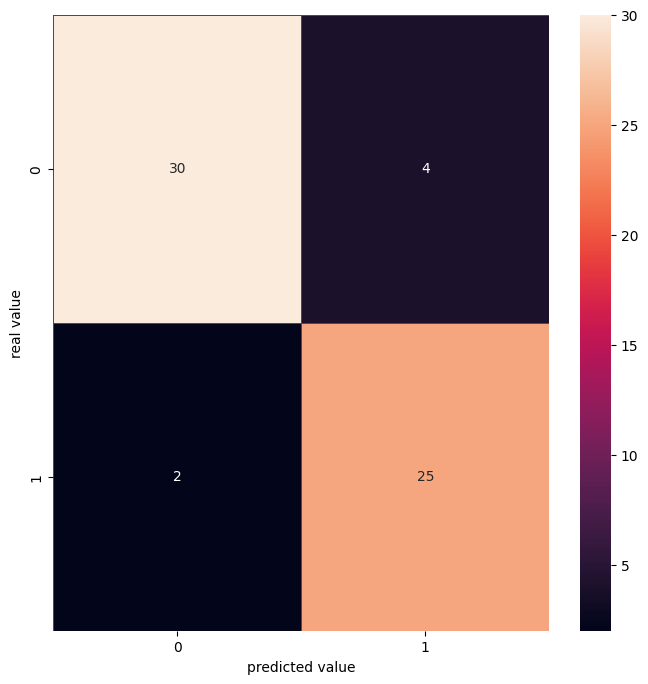

In [ ]:
#Confussion Matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)

#cm visualization
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm_lr,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("predicted value")
plt.ylabel("real value")
plt.show()


In [ ]:
TP_lr = cm_lr[0,0]
TN_lr = cm_lr[1,1]
FP_lr = cm_lr[0,1]
FN_lr = cm_lr[1,0]

#### Classification Report

Classification Report pada Logistic Regression harus memiliki nilai yang tinggi untuk mencapai model yang baik, dimana f1-score = 0.91 dan 0.89 yang membuktikan bahwa model ini sangat baik.

In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.93      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



#### Recall

Recall dengan nilai tinggi 0.93 sudah sangat baik.

In [ ]:
recall_lr = TP_lr/(TP_lr + FN_lr)
print("Recall:",recall_lr)

Recall: 0.9375


#### Specificity
Specificity dengan nilai tinggi 0.86 sudah sangat baik.

In [ ]:
specificity_lr= TN_lr / (TN_lr + FP_lr)
print("Specificity:",specificity_lr)

Specificity: 0.8620689655172413


#### Cross Validation

Nilai K pada K-fold adalah jumlah pembagian dataset sebanyak K bagian dengan jumlah yang sama besar, lalu melakukan pelatihan dan pengujian model sebanyak K kali.

Pada Logistic Regression, dengan nilai K=5, dihasilkan nilai CV rata-rata tinggi 0.83 yang membuktikan bahwa model ini baik dan nilai standar deviasi yang rendah 0.06 membuktikan bahwa model ini baik.

In [ ]:
# Cross Validation
lr = LogisticRegression(max_iter=1000)

k = 5
cv_scores_lr = cross_val_score(lr, X, Y, cv=k, scoring='accuracy')

#Standar Deviasi
std_deviation_lr = np.std(cv_scores_lr)
print('Standar Deviasi:', std_deviation_lr)

#Rata-rata
print('CV Scores Average:', cv_scores_lr.mean())

Standar Deviasi: 0.06497941018581492
CV Scores Average: 0.8312021857923497


#### Bootstrapping

Nilai accuracy rata-rata yang dihasilkan oleh bootstrapping pada logistic regression sangat tinggi 0.91 dimana hal tersebut membuktikan bahwa model sangat baik. Kemudian dengan nilai standar deviasi accuracy yang rendah 1,11e-16 membuktikan bahwa model sangat baik.

In [ ]:
#Bootstrapping
lr = LogisticRegression(max_iter=1000)
bagging_model_lr = BaggingClassifier(lr, n_estimators=10, random_state=42)

# List
accuracy_scores_lr = []

# Iterasi Bootstrapping
n_iterations = 5
for i in range(n_iterations):

    # Latih model
    bagging_model_lr.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred_bootlr = bagging_model_lr.predict(X_test)

    # Evaluasi kinerja model dan simpan hasil akurasi
    accuracy_bagging_lr = accuracy_score(y_test, y_pred_bootlr)
    accuracy_scores_lr.append(accuracy_bagging_lr)

# Hitung rata-rata dan standar deviasi dari hasil akurasi
mean_accuracy_lr = np.mean(accuracy_scores_lr)
std_dev_accuracy_lr = np.std(accuracy_scores_lr)

print("Rata-rata Accuracy:", mean_accuracy_lr)
print("Standar Deviasi Accuracy:", std_dev_accuracy_lr)


Rata-rata Accuracy: 0.9180327868852458
Standar Deviasi Accuracy: 1.1102230246251565e-16


#### Learning Curve
Learning Curve pada Logistic Regression ialah Goodfit, karena sangat mendekati dengan karakteristik berikut :  
1. nilai akurasi dari training dan validation berdekatan
2. nilai akurasi validasi lebih kecil dari akurasi training
3. kurva mencapai garis stabil di satu titik.

In [ ]:
def draw_learning_curves(X, Y, estimator_lr, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator_lr, X, Y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores,axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)

    plt.grid
    plt.title ("Learning Curve")
    plt.xlabel("Jumlah Data")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes,train_scores_mean,'o-',color="g", label="Training")
    plt.plot(train_sizes,test_scores_mean,'o-',color="y", label="Validation")

    plt.legend(loc="best")
    plt.show()

[0.96666667 0.9        0.89166667 0.90416667 0.85833333 0.87361111
 0.88095238 0.88541667 0.86203704 0.85726141]


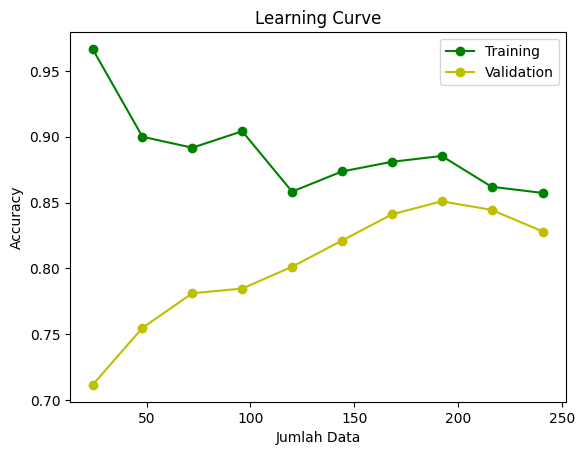

In [ ]:
#LR
estimator_lr = LogisticRegression(max_iter=1000)
draw_learning_curves(X,Y,estimator_lr,10)

## **Support Vector Machine (SVM)**

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

### Model Evaluation

#### Model Predict

In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

#### Accuracy

Accuracy dari SVM = 0.60 dimana nilai tersebut kurang baik.

In [ ]:
accuracy_svm = svm.score(X_test,y_test)
print("Accuracy:", accuracy_svm)

Accuracy: 0.6065573770491803


#### Confussion Matrix
Confussion Matrix pada SVM memiliki :
1.  Nilai FP = 22, FN = 2 bernilai tinggi sehingga penilaian tersebut kurang baik.
2. Nilai TP = 12, TN = 25 bernilai tinggi sehingga penilaian tersebut kurang baik.


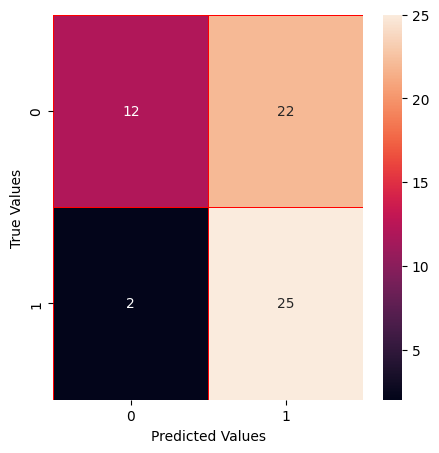

In [ ]:
#Confussion Matrix
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test,y_pred_svm)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
TP_svm = cm_svm[0,0]
TN_svm = cm_svm[1,1]
FP_svm = cm_svm[0,1]
FN_svm = cm_svm[1,0]

#### Classification Report
Classification Report pada SVM harus memiliki nilai yang tinggi untuk mencapai model yang baik, dimana f1-score = 0.50 dan 0.68 yang membuktikan bahwa model ini kurang baik.


In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.35      0.50        34
           1       0.53      0.93      0.68        27

    accuracy                           0.61        61
   macro avg       0.69      0.64      0.59        61
weighted avg       0.71      0.61      0.58        61



#### Recall
Recall dengan nilai tinggi 0.85 sudah sangat baik.



In [ ]:
recall_svm = TP_svm / (TP_svm + FN_svm)
print("Recall: ",recall_svm)

Recall:  0.8571428571428571


#### Specificity
Specificity dengan nilai tinggi 0.53 menunjukkan bahwa model kurang baik.

In [ ]:
specificity_svm= TN_svm / (TN_svm + FP_svm)
print("Specificity:",specificity_svm)

Specificity: 0.5319148936170213


#### Cross Validation
Nilai K pada K-fold adalah jumlah pembagian dataset sebanyak K bagian dengan jumlah yang sama besar, lalu melakukan pelatihan dan pengujian model sebanyak K kali.

Pada SVM, dengan nilai K=5, dihasilkan nilai CV rata-rata tinggi 0.82 yang membuktikan bahwa model ini baik dan nilai standar deviasi yang rendah 0.05 membuktikan bahwa model ini baik.


In [ ]:
# Inisialisasi model SVM
linear_svc = SVC(kernel='linear')

# Cross-validation dengan akurasi sebagai metrik
cv_scores_svm = cross_val_score(linear_svc, X, Y, cv=5, scoring='accuracy')

#Standar Deviasi
std_deviation_svm = np.std(cv_scores_svm)
print('Standar Deviasi:', std_deviation_svm)

# Rata-rata skor
print('CV Scores Average:', cv_scores_svm.mean())

Standar Deviasi: 0.058947288016412025
CV Scores Average: 0.8278688524590164


#### Bootstrapping


Nilai accuracy rata-rata yang dihasilkan oleh bootstrapping pada SVM sangat rendah 0.59 dimana hal tersebut membuktikan bahwa model kurang baik. Kemudian dengan nilai standar deviasi accuracy yang bernilai 0 yang dimana hal tersebut sangat diragukan kebenarannya, maka hal tersebut membuat model ini kurang baik



In [ ]:
#Bootstrapping
svm = SVC()
bagging_model_svm = BaggingClassifier(svm, n_estimators=10, random_state=42)

# List
accuracy_scores_svm = []

#Iterasi bootstrapping
n_iterations = 5
for i in range(n_iterations):

    # Latih model
    bagging_model_svm.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred_bootsvm = bagging_model_svm.predict(X_test)

    # Evaluasi kinerja model dan simpan hasil akurasi
    accuracy_bagging_svm = accuracy_score(y_test, y_pred_bootsvm)
    accuracy_scores_svm.append(accuracy_bagging_svm)

# Hitung rata-rata dan standar deviasi dari hasil akurasi
mean_accuracy_svm = np.mean(accuracy_scores_svm)
std_dev_accuracy_svm = np.std(accuracy_scores_svm)

print("Rata-rata Accuracy:", mean_accuracy_svm)
print("Standar Deviasi Accuracy:", std_dev_accuracy_svm)


Rata-rata Accuracy: 0.5901639344262295
Standar Deviasi Accuracy: 0.0


#### Learning Curve

Learning Curve pada SVM ialah Goodfit, karena sangat mendekati dengan karakteristik berikut :

1. nilai akurasi dari training dan validation berdekatan
2. nilai akurasi validasi lebih kecil dari akurasi training
3. kurva mencapai garis stabil di satu titik.

In [ ]:
def draw_learning_curves(X, Y, estimator_svm, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator_svm, X, Y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores,axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)

    plt.grid
    plt.title ("Learning Curve")
    plt.xlabel("Jumlah Data")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes,train_scores_mean,'o-',color="g", label="Training")
    plt.plot(train_sizes,test_scores_mean,'o-',color="y", label="Validation")

    plt.legend(loc="best")
    plt.show()

[0.625      0.56666667 0.575      0.61666667 0.665      0.70833333
 0.70595238 0.678125   0.6712963  0.66307054]


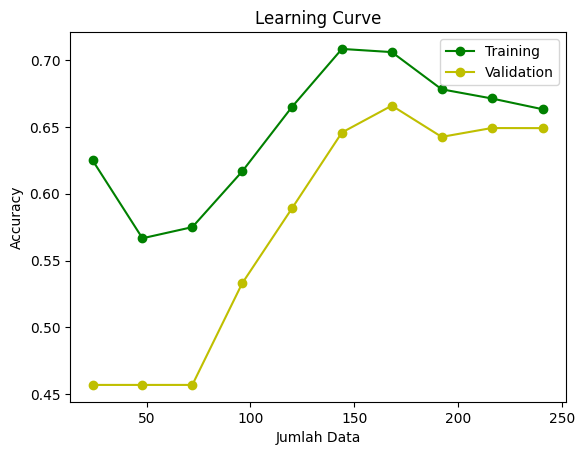

In [ ]:
#SVM
estimator_svm = SVC()
draw_learning_curves(X,Y,estimator_svm,10)

## **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

#### Model Predict

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

####  Accuracy

Accuracy dari Decision Tree = 0.73 dimana nilai tersebut cukupbaik.


In [ ]:
accuracy_dt = dt.score(X_test,y_test)
print("Accuracy:", accuracy_dt)

Accuracy: 0.7377049180327869


#### Confussion Matrix

Confussion Matrix pada Decision Tree memiliki nilai :
1. Nilai FP = 7 FN = 9 bernilai rendah sehingga penilaian tersebut sangat baik.
2. Nilai TP = 27 TN = 18 bernilai sedikit sehingga penilaian tersebut cukup baik.


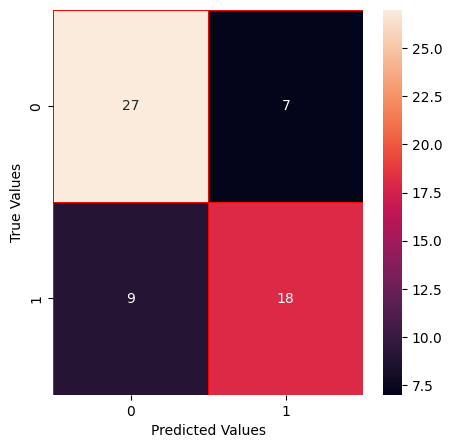

In [ ]:
#Confusion Matrix
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
TP_dt = cm_dt[0,0]
TN_dt = cm_dt[1,1]
FP_dt = cm_dt[0,1]
FN_dt = cm_dt[1,0]

#### Classification Report
Classification Report pada Decision Tree harus memiliki nilai yang tinggi untuk mencapai model yang baik, dimana f1-score = 0.77 dan 0.69 yang membuktikan bahwa model ini cukup baik.


In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.72      0.67      0.69        27

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



#### Recall
Recall dengan nilai tinggi 0.77 cukup baik.



In [ ]:
recall_dt = TP_dt / (TP_dt + FN_dt)
print("Recall : ",recall_dt)

Recall :  0.75


#### Specificity

Specificity dengan nilai tinggi 0.72 cukup baik.


In [ ]:
specificity_dt= TN_dt / (TN_dt + FP_dt)
print("Specificity :" ,specificity_dt)

Specificity : 0.72


####Cross Validation
Nilai K pada K-fold adalah jumlah pembagian dataset sebanyak K bagian dengan jumlah yang sama besar, lalu melakukan pelatihan dan pengujian model sebanyak K kali.

Pada Decision Tree, dengan nilai K=5, dihasilkan nilai CV rata-rata tinggi 0.78 yang membuktikan bahwa model ini cukup baik dan nilai standar deviasi yang rendah 0.04 membuktikan bahwa model ini baik.



In [ ]:
# Cross-validation dengan akurasi sebagai metrik
dt = DecisionTreeClassifier()
cv_scores_dt = cross_val_score(dt, X, Y, cv=5, scoring='accuracy')

#Standar Deviasi
std_deviation_dt = np.std(cv_scores_dt)
print('Standar Deviasi:', std_deviation_dt)

# Rata-rata s
print('CV Scores Average:', cv_scores_dt.mean())

Standar Deviasi: 0.04576299644788397
CV Scores Average: 0.7881967213114753


#### Bootstrapping
Nilai accuracy rata-rata yang dihasilkan oleh bootstrapping pada Decision Tree sangat tinggi 0.88 dimana hal tersebut membuktikan bahwa model sangat baik. Kemudian dengan nilai standar deviasi accuracy yang bernilai 0 yang dimana hal tersebut sangat diragukan kebenarannya, maka hal tersebut membuat model ini kurang baik


In [ ]:
#Bootstrapping

dt = DecisionTreeClassifier()
bagging_model_dt = BaggingClassifier(dt, n_estimators=10, random_state=42)

# List
accuracy_scores_dt = []

#Iterasi bootstrapping
n_iterations = 5
for i in range(n_iterations):

    # Latih model
    bagging_model_dt.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred_bootdt = bagging_model_dt.predict(X_test)

    # Evaluasi kinerja model dan simpan hasil akurasi
    accuracy_bagging_dt = accuracy_score(y_test, y_pred_bootdt)
    accuracy_scores_dt.append(accuracy_bagging_dt)

# Hitung rata-rata dan standar deviasi dari hasil akurasi
mean_accuracy_dt = np.mean(accuracy_scores_dt)
std_dev_accuracy_dt = np.std(accuracy_scores_dt)

print("Rata-rata Accuracy:", mean_accuracy_dt)
print("Standar Deviasi Accuracy:", std_dev_accuracy_dt)


Rata-rata Accuracy: 0.8852459016393442
Standar Deviasi Accuracy: 0.0


#### Learning Curve


Learning Curve pada Decision Tree ialah Overfit, karena sangat mendekati dengan karakteristik berikut :

1. Jarak nilai akurasi training dan validasi cukup tinggi
2. Akurasi training  bertambah dan memiliki nilai yang sangat tinggi.

In [ ]:
def draw_learning_curves(X, Y, estimator_dt, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator_dt, X, Y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores,axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)

    plt.grid
    plt.title ("Learning Curve")
    plt.xlabel("Jumlah Data")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes,train_scores_mean,'o-',color="g", label="Training")
    plt.plot(train_sizes,test_scores_mean,'o-',color="y", label="Validation")

    plt.legend(loc="best")
    plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


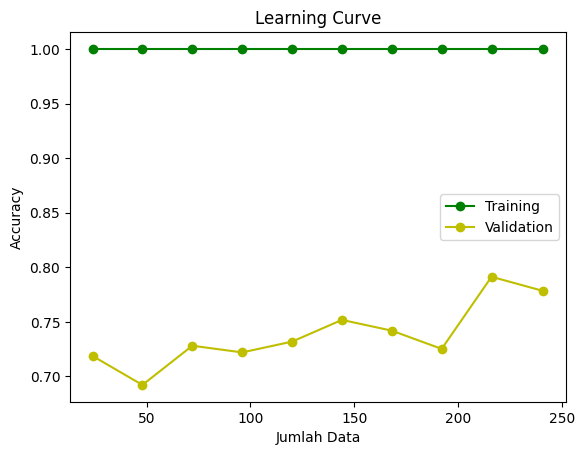

In [ ]:
#DT
estimator_dt = DecisionTreeClassifier()
draw_learning_curves(X,Y,estimator_dt,10)

## **Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### Model Evaluation

#### Model Predict

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

#### Accuracy
Accuracy dari Random Forest = 0.83 dimana nilai tersebut sangat baik.


In [ ]:
accuracy_rf = rf.score(X_test,y_test)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8360655737704918


#### Confussion Matrix

Confussion Matrix pada Confussion Matrix memiliki nilai :
1. Nilai FP = 5, FN = 5 bernilai rendah sehingga penilaian tersebut sangat baik.
2. Nilai TP = 29, TN = 22 bernilai tinggi sehingga penilaian tersebut sangat baik.


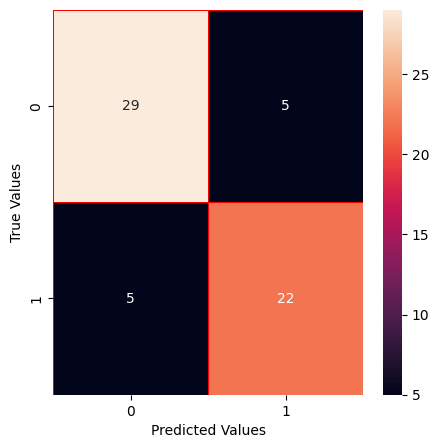

In [ ]:
#Confusion Matrix
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred_rf)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
TP_rf = cm_rf[0,0]
TN_rf = cm_rf[1,1]
FP_rf = cm_rf[0,1]
FN_rf = cm_rf[1,0]

#### Classification Report

Classification Report pada Random Forest harus memiliki nilai yang tinggi untuk mencapai model yang baik, dimana f1-score = 0.85 dan 0.81 yang membuktikan bahwa model ini sangat baik.


In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.81      0.81      0.81        27

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



#### Recall

Recall dengan nilai tinggi 0.85 sudah sangat baik.


In [ ]:
recall_rf = TP_rf / (TP_rf + FN_rf)
print("Recall : ", recall_rf)

Recall :  0.8529411764705882


#### Specificity

Specificity dengan nilai tinggi 0.81 sudah sangat baik.


In [ ]:
specificity_rf= TN_rf / (TN_rf + FP_rf)
print("Specificity :",specificity_rf)

Specificity : 0.8148148148148148


#### Cross Validation


Nilai K pada K-fold adalah jumlah pembagian dataset sebanyak K bagian dengan jumlah yang sama besar, lalu melakukan pelatihan dan pengujian model sebanyak K kali.

Pada Random Forest, dengan nilai K=5, dihasilkan nilai CV rata-rata tinggi 0.83 yang membuktikan bahwa model ini baik dan nilai standar deviasi yang rendah 0.05 membuktikan bahwa model ini baik.



In [ ]:
# Cross-validation dengan akurasi sebagai metrik
rf = RandomForestClassifier()
cv_scores_rf = cross_val_score(rf, X, Y, cv=5, scoring='accuracy')

# Standard Deviasi
std_deviation_rf = np.std(cv_scores_rf)
print('Standar Deviasi:', std_deviation_rf)

# Menampilkan rata-rata skor validasi silang
print('CV Scores Average:', cv_scores_rf.mean())

Standar Deviasi: 0.059113055831712884
CV Scores Average: 0.8310928961748634


#### Bootstrapping


Nilai accuracy rata-rata yang dihasilkan oleh bootstrapping pada Random Forest sangat tinggi 0.90 dimana hal tersebut membuktikan bahwa model sangat baik. Kemudian dengan nilai standar deviasi accuracy yang bernilai 0 yang dimana hal tersebut sangat diragukan kebenarannya, maka hal tersebut membuat model ini kurang baik



In [ ]:
#Bootstrapping

rf = RandomForestClassifier()
bagging_model_rf = BaggingClassifier(rf, n_estimators=10, random_state=42)

#List
accuracy_scores_rf = []

# Iterasi bootstrapping
n_iterations = 5
for i in range(n_iterations):

    # Latih model
    bagging_model_rf.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred_bootrf = bagging_model_rf.predict(X_test)

    # Evaluasi kinerja model dan simpan hasil akurasi
    accuracy_bagging_rf = accuracy_score(y_test, y_pred_bootrf)
    accuracy_scores_rf.append(accuracy_bagging_rf)

# Hitung rata-rata dan standar deviasi dari hasil akurasi
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_dev_accuracy_rf = np.std(accuracy_scores_rf)

print("Rata-rata Accuracy:", mean_accuracy_rf)
print("Standar Deviasi Accuracy:", std_dev_accuracy_rf)

Rata-rata Accuracy: 0.9016393442622951
Standar Deviasi Accuracy: 0.0


#### Learning Curve

Learning Curve pada Decision tree ialah Overfit, karena sangat mendekati dengan karakteristik berikut :

1. Jarak nilai akurasi dan validasi cukup tinggi
2. Akurasi training bertambah dan memiliki nilai yang sangat tinggi

In [ ]:
def draw_learning_curves(X, Y, estimator_rf, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator_rf, X, Y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores,axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)

    plt.grid
    plt.title ("Learning Curve")
    plt.xlabel("Jumlah Data")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes,train_scores_mean,'o-',color="g", label="Training")
    plt.plot(train_sizes,test_scores_mean,'o-',color="y", label="Validation")

    plt.legend(loc="best")
    plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


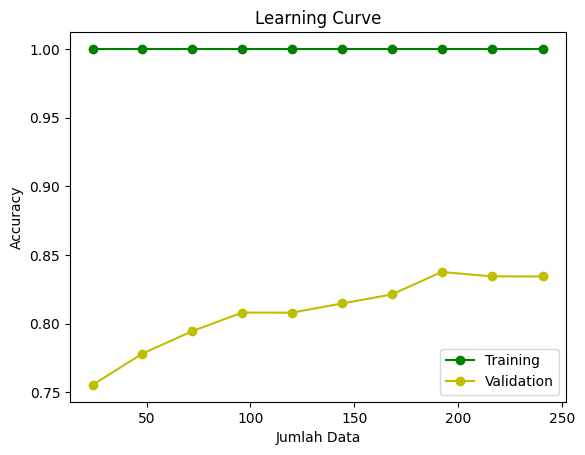

In [ ]:
#RF
estimator_rf = RandomForestClassifier()
draw_learning_curves(X,Y,estimator_rf,10)

## **Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(X_test,y_test)

GaussianNB()

### Model Evaluation

#### Model Predict

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

#### Accuracy
Accuracy dari Naive Bayes = 0.83 dimana nilai tersebut sangat baik.



In [ ]:
accuracy_nb = nb.score(X_test,y_test)
print("Accuracy:", accuracy_nb)

Accuracy: 0.8360655737704918


#### Confussion Matrix
Confussion Matrix pada Naive Bayes memiliki nilai :
1. Nilai FP = 6, FN = 4 bernilai rendah sehingga penilaian tersebut sangat baik.
2. Nilai TP = 28, TN = 23 bernilai tinggi sehingga penilaian tersebut sangat baik.


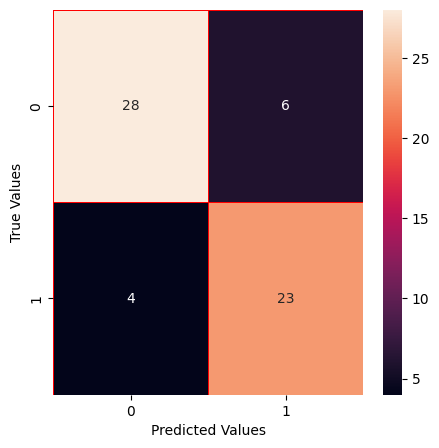

In [ ]:
#Confusion Matrix
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test,y_pred_nb)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_nb,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
TP_nb = cm_nb[0,0]
TN_nb = cm_nb[1,1]
FP_nb = cm_nb[0,1]
FN_nb = cm_nb[1,0]

#### Classification Report

Classification Report pada Naive Bayes harus memiliki nilai yang tinggi untuk mencapai model yang baik, dimana f1-score = 0.85 dan 0.82 yang membuktikan bahwa model ini sangat baik.


In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.79      0.85      0.82        27

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



#### Recall

Recall dengan nilai tinggi 0.875 sudah sangat baik.


In [ ]:
recall_nb = TP_nb / (TP_nb + FN_nb)
print("Recall : ", recall_nb)

Recall :  0.875


#### Specificity

Specificity dengan nilai tinggi 0.79 sudah cukup baik.


In [ ]:
specificity_nb= TN_nb / (TN_nb + FP_nb)
print("Specificity :",specificity_nb)

Specificity : 0.7931034482758621


#### Cross Validation

Nilai K pada K-fold adalah jumlah pembagian dataset sebanyak K bagian dengan jumlah yang sama besar, lalu melakukan pelatihan dan pengujian model sebanyak K kali.

Pada Naive Bayes, dengan nilai K=5, dihasilkan nilai CV rata-rata tinggi 0.80 yang membuktikan bahwa model ini baik dan nilai standar deviasi yang rendah 0.06 membuktikan bahwa model ini baik.



In [ ]:
# Cross-validation dengan akurasi sebagai metrik
nb = GaussianNB()
cv_scores_nb = cross_val_score(nb, X, Y, cv=5, scoring='accuracy')

#Standar Deviasi
std_deviation_nb = np.std(cv_scores_nb)
print('Standar Deviasi:', std_deviation_nb)

# Rata-rata
print('CV Scores Average:', cv_scores_nb.mean())

Standar Deviasi: 0.06675676971190218
CV Scores Average: 0.80775956284153


#### Bootstrapping


Nilai accuracy rata-rata yang dihasilkan oleh bootstrapping pada Naive Bayes sangat tinggi 0.83 dimana hal tersebut membuktikan bahwa model sangat baik. Kemudian dengan nilai standar deviasi accuracy yang bernilai 0 yang dimana hal tersebut sangat diragukan kebenarannya, maka hal tersebut membuat model ini kurang baik



In [ ]:
nb = GaussianNB()

bagging_model_nb = BaggingClassifier(nb, n_estimators=10, random_state=42)

#List
accuracy_scores_nb = []

#Iterasi bootstrapping
n_iterations = 5
for i in range(n_iterations):

    # Latih model
    bagging_model_nb.fit(X_train, y_train)

    # Lakukan prediksi
    y_pred_bootnb = bagging_model_nb.predict(X_test)

    # Evaluasi kinerja model dan simpan hasil akurasi
    accuracy_bagging_nb = accuracy_score(y_test, y_pred_bootnb)
    accuracy_scores_nb.append(accuracy_bagging_nb)

# Hitung rata-rata dan standar deviasi dari hasil akurasi
mean_accuracy_nb = np.mean(accuracy_scores_nb)
std_dev_accuracy_nb = np.std(accuracy_scores_nb)

print("Rata-rata Accuracy:", mean_accuracy_nb)
print("Standar Deviasi Accuracy:", std_dev_accuracy_nb)


Rata-rata Accuracy: 0.8360655737704918
Standar Deviasi Accuracy: 0.0


#### Learning Curve

Learning Curve pada Naive Bayes ialah Goodfit, karena sangat mendekati dengan karakteristik berikut :

1. nilai akurasi dari training dan validation berdekatan
2. nilai akurasi validasi lebih kecil dari akurasi training
3. kurva mencapai garis stabil di satu titik.

In [ ]:
def draw_learning_curves(X, Y, estimator_nb, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator_nb, X, Y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores,axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)

    plt.grid
    plt.title ("Learning Curve")
    plt.xlabel("Jumlah Data")
    plt.ylabel("Accuracy")

    plt.plot(train_sizes,train_scores_mean,'o-',color="g", label="Training")
    plt.plot(train_sizes,test_scores_mean,'o-',color="y", label="Validation")

    plt.legend(loc="best")
    plt.show()

[0.95833333 0.8875     0.89166667 0.8875     0.86333333 0.86527778
 0.88095238 0.85520833 0.85       0.8439834 ]


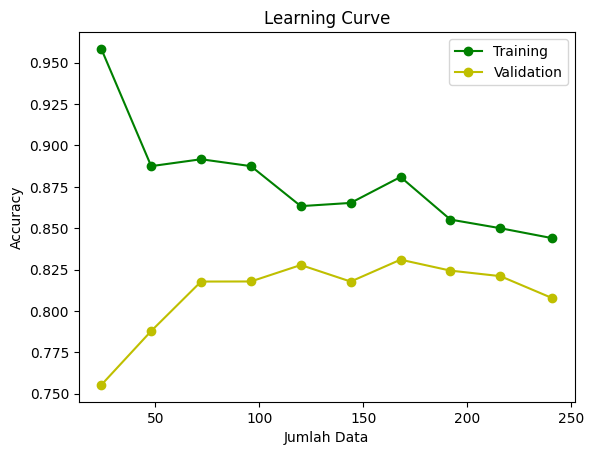

In [ ]:
#NB
estimator_nb = GaussianNB()
draw_learning_curves(X,Y,estimator_nb,10)

# Model Comparison & Summary

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
    'Accuracy': [accuracy_lr, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_svm]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.901639
1,Naive Bayes,0.836066
3,Random Forest,0.836066
2,Decision Tree,0.737705
4,Support Vector Machines,0.606557


Saya memilih Logistic Regression karena:

1. Mendapat akurasi tinggi sebesar 0.90, dengan kesalahan false positive dan false negative yang rendah (4 dan 2), serta jumlah true positive dan true negative yang tinggi (30 dan 25).
2. Logistic Regression memiliki nilai precision 0.94 dan 0.86, recall 0.88 dan 0.93, dan f1-score 0.91 dan 0.89, dimana hal tersebut sangat membuktikan bahwa model ini baik.
3. Dibutuhkan tingkat recall dan specificity yang tinggi, yang dapat dipenuhi dengan regresi logistik dengan recall 0.93 dan specificity 0.86.
4. Dalam cross-validation, Logistic Regression memberikan standar deviasi (std) rendah sebesar 0.06 dan rata-rata (mean) tinggi sebesar 0.83.
5. Dalam teknik bootstrapping, Logistic Regression memberikan nilai akurasi rata-rata yang tinggi sebesar 0.9 dan standar deviasi yang sangat kecil (1.11e-16).
6. Selain itu, learning curve menunjukkan bahwa model Logistic Regression cocok dengan data dengan baik (good fit).






#Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning
lr = LogisticRegression(max_iter=100)

# Daftar hyperparameter yang akan ditelusuri
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga'],
              'max_iter': [50, 75, 100]}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Melatih model
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Melakukan prediksi
y_pred = grid_search.predict(X_test)

# Mendapatkan akurasi pada data uji
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Best Hyperparameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Data: 0.8852459016393442


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Hasil dari penyetelan hyperparameter menunjukkan bahwa model terbaik memiliki parameter C sebesar 0.1, menggunakan metode regularisasi L2 (penalty), solver 'liblinear', dan iterasi maksimum (max_iter) sebesar 50. Dengan konfigurasi ini, model berhasil mencapai akurasi sebesar 88.52% pada data uji yang terpisah.

In [ ]:
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", accuracy)

Best Hyperparameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Data: 0.8852459016393442


#Conclusion & Recommendation

Setelah membangun kelima model klasifikasi machine learning (Logistic Regression, SVM, Decision Tree, Random Forest, dan Naive Bayes), dapat disimpulkan bahwa model yang paling cocok untuk klasifikasi biner (dua kelas) adalah Logistic Regression. Model ini sangat sesuai karena sifatnya yang sederhana dan mudah diinterpretasi, ideal untuk tugas klasifikasi biner.

Sementara itu, Decision Tree dan Random Forest lebih tepat digunakan untuk dataset yang tidak terstruktur dan memiliki dimensi yang besar, dan memerlukan prapemrosesan data yang kompleks. SVM cocok untuk dataset dengan dimensi tinggi, namun perlu perhatian khusus terhadap pemilihan kernel dan parameter.

Model Naive Bayes efektif untuk dataset berdimensi besar, meskipun perlu dicatat bahwa asumsi independensi fitur dapat memengaruhi kinerja model dalam beberapa kasus. Oleh karena itu, dalam konteks klasifikasi biner ini, Logistic Regression menjadi pilihan yang paling sesuai berdasarkan karakteristik dan persyaratan data.






